# Data Wrangling Template

## Gather

In [1]:
import pandas as pd
import zipfile

In [3]:
# Extract all contents from zip file
with zipfile.ZipFile('armenian-online-job-postings.zip', 'r') as myzip:
    myzip.extractall()

In [3]:
# Read CSV (comma-separated) file into DataFrame
df = pd.read_csv('online-job-postings.csv')

## Assess

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15110 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9623 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

- Missing values (NaN)
- StartDate inconsistencies (ASAP)
- Nondescriptive column headers (ApplicationP, AboutC, RequiredQual ... and also JobRequirment)

## Clean

#### Define

- Select all nondescriptive and misspelled column headers (ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full words (ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement)
- Select all records in the StartDate column that have "As soon as possible", "Immediately", etc. and replace the text in those cells with "ASAP"

#### Code

In [5]:
df_clean = df.copy()

- Select all nondescriptive and misspelled column headers (ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full words (ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement)

In [6]:
df_clean = df_clean.rename(columns={'ApplicationP':'ApplicationProcedure', 
                                    'AboutC':'AboutCompany', 
                                    'RequiredQual':'RequiredQualifications', 
                                    'JobRequirment':'JobRequirements'})

- Select all records in the StartDate column that have "As soon as possible", "Immediately", etc. and replace the text in those cells with "ASAP"

In [7]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

for phrase in asap_list:
    df_clean.StartDate.replace(phrase, 'ASAP', inplace=True)

#### Test

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost                   19001 non-null object
date                      19001 non-null object
Title                     18973 non-null object
Company                   18994 non-null object
AnnouncementCode          1208 non-null object
Term                      7676 non-null object
Eligibility               4930 non-null object
Audience                  640 non-null object
StartDate                 9675 non-null object
Duration                  10798 non-null object
Location                  18969 non-null object
JobDescription            15110 non-null object
JobRequirements           16479 non-null object
RequiredQualifications    18517 non-null object
Salary                    9623 non-null object
ApplicationProcedure      18941 non-null object
OpeningDate               18295 non-null object
Deadline                  18936 non-null object
Notes                     2211 non

In [9]:
df_clean.StartDate.value_counts()

ASAP                                6856
01 September 2012                     31
March 2006                            27
November 2006                         22
January 2010                          19
01 February 2005                      17
February 2014                         17
September 2010                        16
February 2011                         16
TBD                                   16
September 2008                        15
March 2011                            15
February 2007                         14
01 February 2015                      14
01 July 2014                          14
01 March 2006                         13
January 2016                          13
01 September 2010                     13
01 September 2008                     13
01 March 2012                         12
01 October 2008                       12
01 April 2014                         12
September 2013                        12
01 October 2012                       12
Fall 2010       

In [10]:
for phrase in asap_list:
    assert phrase not in df_clean.StartDate.values

## Analysis & Visualization

In [11]:
# Number of 'ASAP' start dates (numerator)
asap_counts = df_clean.StartDate.value_counts()['ASAP']
asap_counts

6856

In [12]:
# Number of non-empty start dates (denominator)
non_empty_counts = df_clean.StartDate.count()
non_empty_counts

9675

In [13]:
# Percentage of positions with an urgent start date i.e. 'ASAP'
asap_counts / non_empty_counts

0.70863049095607233

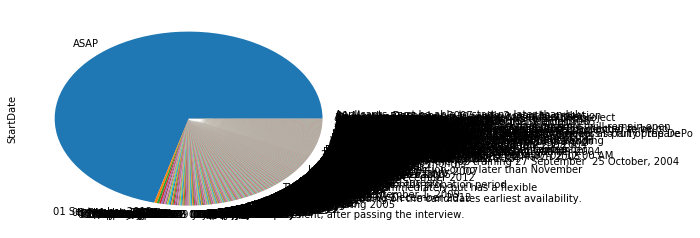

In [14]:
%matplotlib inline
df_clean.StartDate.value_counts().plot(kind="pie")